# ResNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [2]:
resnet50 = ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

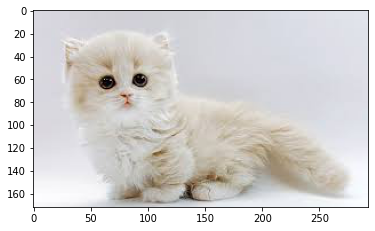

In [4]:
img = Image.open('고양이2.jfif')
plt.imshow(img);

### 1.1 이미지 축소(resize)

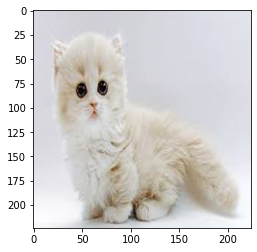

In [5]:
img = img.resize((224, 224))    # Pillow의 resize를 이용함
plt.imshow(img);

### 이미지 예측

In [6]:
np.array(img).shape

(224, 224, 3)

In [7]:
yhat = resnet50.predict(np.array(img).reshape(1, 224, 224, 3)) #predict는 여러 장이 들어온다는 가정 하에 진행
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02123394', 'Persian_cat', 0.45687097),
   ('n02085936', 'Maltese_dog', 0.29742292),
   ('n02112706', 'Brabancon_griffon', 0.018606259),
   ('n02085782', 'Japanese_spaniel', 0.012768739),
   ('n02120079', 'Arctic_fox', 0.011913629)]])

## 1.2 이미지 센터링
- 이미지를 중앙으로 위치하여 자르기
- 저번에 만든 함수 불러오기

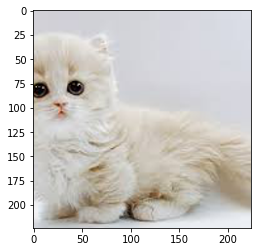

In [8]:
from image_util import center_image

img2 = Image.open('고양이2.jfif')
img2 = center_image(img2, src_format = 'Pillow', dst_format = 'Pillow')
plt.imshow(img2);

In [9]:
yhat = resnet50.predict(np.array(img2).reshape(1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123394', 'Persian_cat', 0.9636851),
   ('n02085936', 'Maltese_dog', 0.020284634),
   ('n02112706', 'Brabancon_griffon', 0.005922592),
   ('n02086240', 'Shih-Tzu', 0.0015398372),
   ('n02086079', 'Pekinese', 0.00073251966)]])